<a href="https://colab.research.google.com/github/basu-a/ML_UChicago/blob/master/Machine_Learning_Project_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization

In [0]:
def display_mfcc(song):
    y, _ = librosa.load(song)
    mfcc = librosa.feature.mfcc(y)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
datasets = "/content/gdrive/My Drive/datasets/Music/"

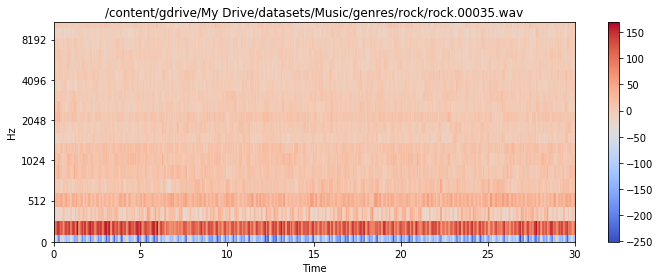

In [5]:
display_mfcc(datasets+'genres/rock/rock.00035.wav')

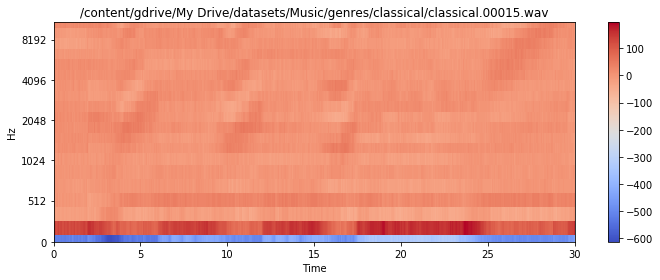

In [7]:
display_mfcc(datasets+'genres/classical/classical.00015.wav')

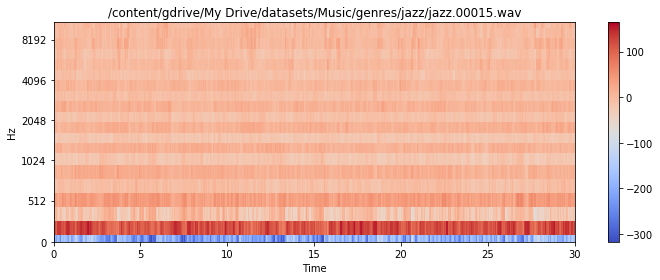

In [8]:
display_mfcc(datasets+'genres/jazz/jazz.00015.wav')

In [0]:
def extract_features_song(f):
    y, _ = librosa.load(f)

    # get Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y)
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)[:25000]

In [0]:
def extract_features_song_2(f):
    y, _ = librosa.load(f)

    # get Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y)
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))

    return mfcc

In [0]:
y =librosa.load(datasets+'genres/rock/rock.00029.wav')


In [23]:
extract_features_song_2(datasets+'genres/rock/rock.00030.wav').shape


(20, 1293)

In [0]:
def generate_features_and_labels():
    all_features = []
    all_labels = []

    genres = ['blues','classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob(datasets+'genres/'+genre+'/*.wav')
        print('Processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files:
            features = extract_features_song_2(f)
            all_features.append(features[:,:1290])
            all_labels.append(genre)

    # convert labels to one-hot encoding
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels

In [58]:
k = generate_features_and_labels()

Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...


In [0]:
features = k[0]
labels = k[1]

In [0]:
for items in features:
  print(items[:,:1290].shape)

In [0]:
import csv

with open(datasets+'saved/'+'features.txt', 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(features)

In [0]:
import csv

with open(datasets+'saved/'+'features_2.txt', 'w') as f:
    csvwriter = csv.writer(f)
    for items in features:
      csvwriter.writerows(items)

In [0]:
import csv

with open(datasets+'saved/'+'labels_2.txt', 'w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerows(labels)

In [0]:
# load numpy array from csv file
#from numpy import loadtxt
# load array
#data = loadtxt('data.csv', delimiter=',')
# print the array
#print(data)

In [0]:
reshaped_features = []
for items in features:
  reshaped_features.append(items[:,:1290])

In [73]:
shapes = []
np.unique(reshaped_features.shape)

AttributeError: ignored

In [0]:
reshaped_features_stacked = np.stack(reshaped_features)

In [63]:
features[0].shape

(20, 1293)

In [101]:
import random

test = random.sample(range(1, 1000), 200)
len(test)

200

In [89]:
x = np.array([0,10,20,30,40,50,60])
exclude = [1, 3, 5]
print (np.delete(x, exclude))

[ 0 20 40 60]


In [104]:
images_train.shape

(200, 20, 1290)

In [99]:
labels[~exclude,:]

TypeError: ignored

In [79]:
features_bkp = features
features = reshaped_features_stacked
print(np.shape(features))
print(np.shape(labels))

training_split = 0.8

# last column has genre, turn it into unique ids
alldata = np.column_stack((features, labels))

np.random.shuffle(alldata)
splitidx = int(len(alldata) * training_split)
train, test = alldata[:splitidx,:], alldata[splitidx:,:]

print(np.shape(train))
print(np.shape(test))

train_input = train[:,:-10]
train_labels = train[:,-10:]

test_input = test[:,:-10]
test_labels = test[:,-10:]

print(np.shape(train_input))
print(np.shape(train_labels))

(1000, 20, 1290)
(1000, 10)


ValueError: ignored

In [0]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(reshaped_features_stacked, labels, test_size=0.3)

In [106]:
train_input[1].shape

(20, 1290)

In [130]:
model = Sequential()

model.add(Conv1D(128, 3, padding='same',input_shape=(train_input[1].shape))) #1
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(5)))

model.add(Conv1D(128, 6, padding='same'))
model.add(Activation('relu')) 

model.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(10)) 
model.add(Activation('softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 20, 128)           495488    
_________________________________________________________________
activation_16 (Activation)   (None, 20, 128)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 128)           512       
_________________________________________________________________
activation_17 (Activation)   (None, 20, 128)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4, 128)           

In [131]:
model.fit(train_input, train_labels, epochs=50, batch_size=16, validation_data=(test_input, test_labels))

loss, acc = model.evaluate(test_input, test_labels, batch_size=32)

print("Done!")
print("Loss: %.4f, accuracy: %.4f" % (loss, acc))

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 4s 5ms/step - loss: 2.1039 - acc: 0.2443 - val_loss: 2.6166 - val_acc: 0.2233
Epoch 2/50
700/700 [==============================] - 2s 3ms/step - loss: 1.8369 - acc: 0.3271 - val_loss: 1.8243 - val_acc: 0.3033
Epoch 3/50
700/700 [==============================] - 2s 3ms/step - loss: 1.7403 - acc: 0.3557 - val_loss: 1.6586 - val_acc: 0.3700
Epoch 4/50
700/700 [==============================] - 2s 3ms/step - loss: 1.6497 - acc: 0.3643 - val_loss: 2.3193 - val_acc: 0.2600
Epoch 5/50
700/700 [==============================] - 2s 3ms/step - loss: 1.6288 - acc: 0.4057 - val_loss: 1.7745 - val_acc: 0.3400
Epoch 6/50
700/700 [==============================] - 2s 3ms/step - loss: 1.5176 - acc: 0.4400 - val_loss: 1.7891 - val_acc: 0.3267
Epoch 7/50
700/700 [==============================] - 2s 3ms/step - loss: 1.4966 - acc: 0.4700 - val_loss: 1.7096 - val_acc: 0.4000
Epoch 8/50
700/700 [==========